In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit

In [110]:
N = 81
E_0 = 20 #V/m
dx = 0.01
dy = 0.01
k = 6.28/0.12 #2pi/długość fali
matrix_1D = np.zeros((N,N))
n = np.ones(N)
f = np.zeros(N)

### 1D

In [111]:
for i in range(1,N-1):
        matrix_1D[i,i] = -2/(dx**2) + k**2/n[i]**2
        matrix_1D[i,i-1] = 1/dx**2
        matrix_1D[i,i+1] = 1/dx**2
matrix_1D[0,0] = -2/dx**2 + k**2/n[0]**2
matrix_1D[0,1] = 1/dx**2
matrix_1D[-1,-1] = -2/dx**2 + k**2/n[-1]
matrix_1D[-1,-2] = 1/dx**2
f[N//2] = 1

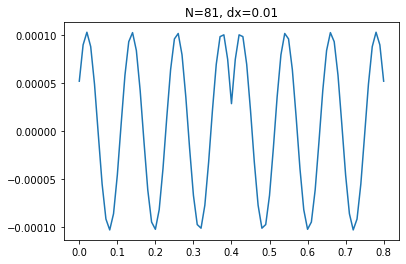

In [112]:
E = np.linalg.solve(matrix_1D, f)
x = np.arange(0,dx*N,dx)
plt.title('N={}, dx={}'.format(N,dx))
plt.plot(x,E)

### 2D

In [113]:
matrix_2D = np.zeros((N**2,N**2))
n_2D = np.ones((N**2))
f_2D = np.zeros(N**2)
f_2D[N**2//2 + 1]=10
# f_2D[N**2//2 + N//2]=1


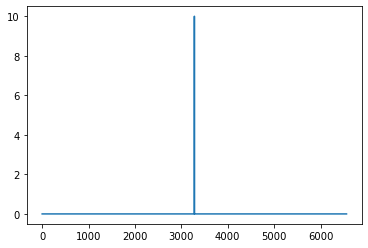

In [114]:
plt.plot(f_2D)

In [115]:
def idx1D(i , j, Ny):
    return i * Ny + j

def idy1D(i , j, Ny):
    return i * Ny - j

In [116]:
# for i in range(N):
#     for j in range(N):
#         matrix_2D[idx1D(i, j, Ny), idx1D(i + 1, j, Ny)] = 1/dx**2

In [117]:
matrix_2D = np.zeros((N**2,N**2))

for i in range(N**2):
    matrix_2D[i,i] = -2/dx**2 -2/dy**2 + k**2/n_2D[i]**2

for i in range(N**2-1):
    matrix_2D[i,i+1] = 1/dy**2

for i in range(1,N**2):
    matrix_2D[i,i-1] = 1/dy**2

# for i in range(N**2-N):
#     matrix_2D[i,i+N] = 1/dx**2

# for i in range(N,N**2): 
#     matrix_2D[i,i-N] = 1/dx**2    

for i in range(N-1):
    for j in range(N):
        matrix_2D[idx1D(i, j, N), idx1D(i + 1, j, N)] = 1/dx**2

for i in range(N):
    for j in range(N):
        matrix_2D[idy1D(i, j, N), idy1D(i - 1, j, N)] = 1/dx**2

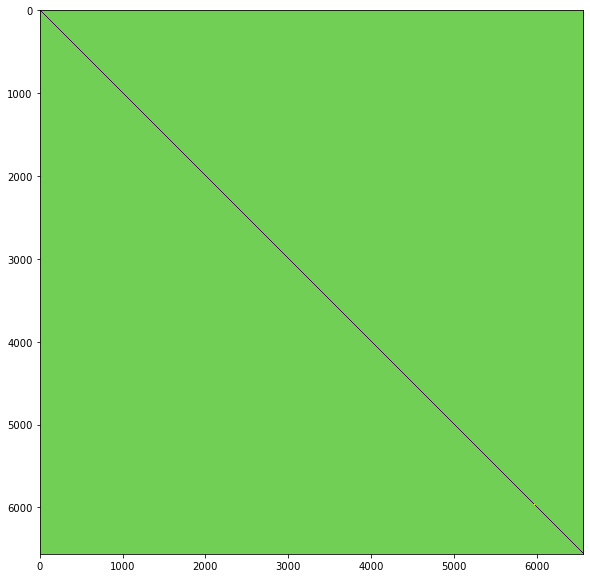

In [118]:
# matrix_2D[0,-5] = 0
# matrix_2D[1,-4] = 0
# matrix_2D[2,-3] = 0
# matrix_2D[3,-2] = 0
# matrix_2D[4,-1] = 0
plt.figure(figsize=(10,10))
plt.imshow(matrix_2D)

In [119]:
81//2

40

In [120]:
f_2D = np.zeros(N**2)
f_2D[N**2//2]=1
E_2D = np.linalg.solve(matrix_2D, f_2D)

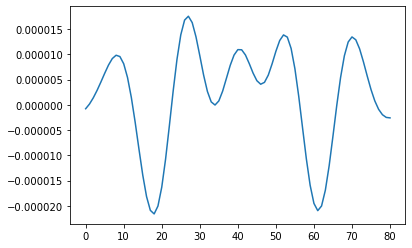

In [121]:
plt.plot(E_2D[N:2*N])

In [122]:
E_2D_matrix = np.zeros((N,N))
for i in range(N-1):
    E_2D_matrix[i] = E_2D[i*N:(i+1)*N]

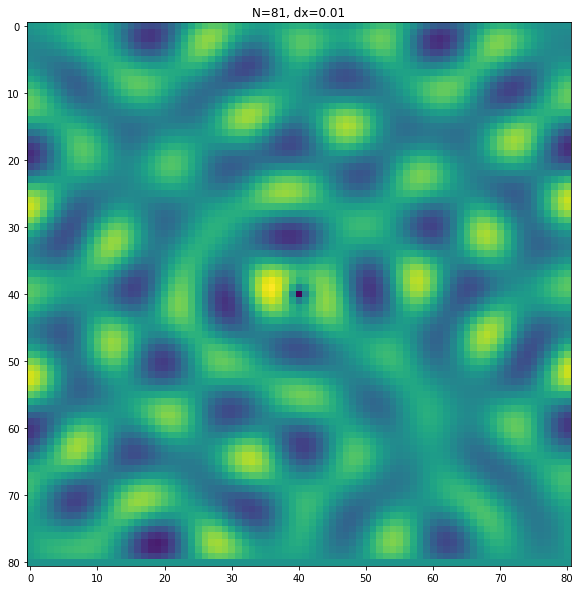

In [123]:
plt.figure(figsize=(10,10))
plt.title('N={}, dx={}'.format(N,dx))
plt.imshow(E_2D_matrix)

In [108]:
# @jit
def calcMatrix(k):
    for i in range(N**2):
        matrix_2D[i,i] = -2/dx**2 -2/dy**2 + k**2/n_2D[i]**2

    for i in range(N**2-1):
        matrix_2D[i,i+1] = 1/dy**2

    for i in range(1,N**2):
        matrix_2D[i,i-1] = 1/dy**2

    for i in range(N**2-N):
        matrix_2D[i,i+N] = 1/dx**2

    for i in range(N,N**2):
        matrix_2D[i,i-N] = 1/dx**2    
    return matrix_2D

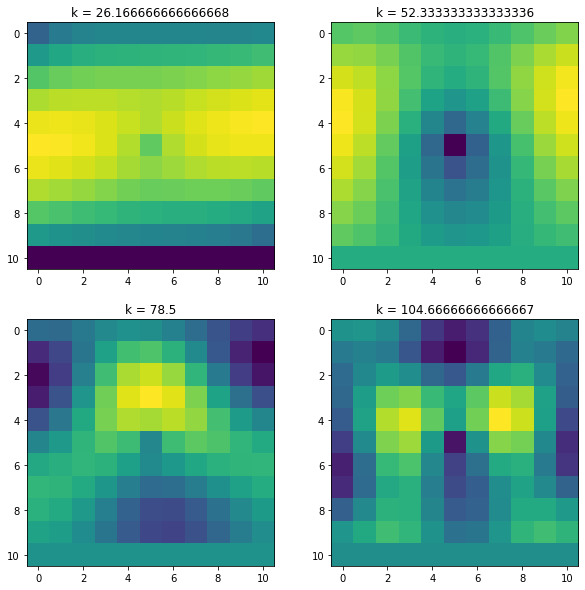

In [109]:
temp_arr_matrix = np.zeros((N,N))
K = np.linspace(6.28/0.12 * 0.5, 6.28/0.12 *2, 4)

plt.figure(figsize=(10,10))
for i in range(4):
    temp_arr = calcMatrix(K[i])
    temp_E = np.linalg.solve(temp_arr, f_2D)
    for j in range(N-1):
        temp_arr_matrix[j] = temp_E[j*N:(j+1)*N]
    plt.subplot(2,2,i+1)
    plt.title('k = {}'.format(K[i]))
    plt.imshow(temp_arr_matrix)